import numpy as np
import opencv2 as cv

In [20]:
import numpy as np
import cv2 
import  matplotlib.pyplot as plt
%matplotlib inline

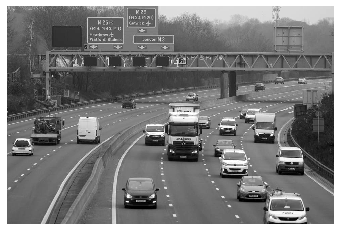

In [48]:
'''
cv2.IMREAD_UNCHANGED  or -1
cv2.IMREAD_GRAYSCALE  or 0
cv2.IMREAD_COLOR  or 1


#Displays image inside a window
cv2.imshow('the title you wnat',img)  
cv2.waitKey(0)
cv2.destroyAllWindows()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

'''


img = cv2.imread('highway1.jpg', -1) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.imshow(gray,cmap="gray")
plt.show()


[[161 137 179 ... 212 212 212]
 [138 115 182 ... 212 212 212]
 [125 119 176 ... 212 212 212]
 ...
 [ 91  91  91 ...  99  99  99]
 [ 91  91  91 ... 100 100  99]
 [ 91  91  91 ... 100 100 100]]


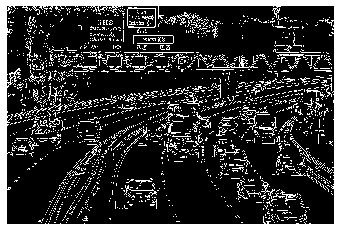

In [54]:
print(gray)
edges=cv2.Canny(gray,50,100)
plt.axis("off")
plt.imshow(edges,cmap="gray")
plt.show()


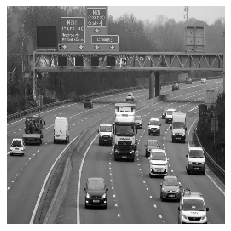

In [62]:
img = cv2.imread('highway1.jpg', 0) 

img=cv2.resize(img,(256,256))
plt.axis("off")
plt.imshow(img,cmap="gray")
plt.show()


#gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)




In [63]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

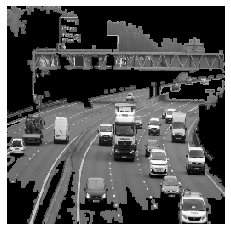

In [64]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(segmented,cmap="gray")
plt.show()
